In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import random

from scipy.stats import shapiro
from scipy import stats
from scipy.stats import probplot
from scipy.stats import ttest_ind, mannwhitneyu
from scipy.stats import chi2_contingency
# from statsmodels.stats.weightstats import zconfint
import warnings
warnings.filterwarnings('ignore')



Attribute Information
1) id: unique identifier
2) gender: "Male", "Female" or "Other"
3) age: age of the patient
4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
6) ever_married: 0 - "No" or 1 - "Yes"
7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
8) Residence_type: 0 - "Rural" or 1 - "Urban"
9) avg_glucose_level: average glucose level in blood
10) bmi: body mass index
11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
12) stroke: 1 if the patient had a stroke or 0 if not
*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

Acknowledgements
(Confidential Source) - Use only for educational purposes
If you use this dataset in your research, please credit the author.

In [2]:
df = pd.read_csv('./healthcare-dataset-stroke-data.csv')

__Выведем информацию о датасете:__

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [4]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
df.shape

(5110, 12)

In [6]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [7]:
target = 'stroke'

__Посмотрим распределение целевого признака "stroke":__

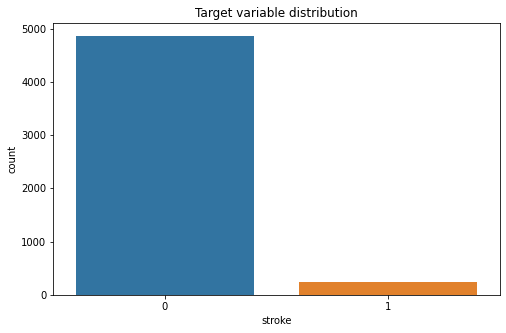

In [8]:
plt.figure(figsize=(8, 5))

sns.countplot(x=target, data=df)

plt.title('Target variable distribution')
plt.show()

In [9]:
# df.drop('id', axis=1, inplace=True)

__Для удобства переведем некоторые категориальные признаки в биноминальные:__

In [10]:
df.replace({'gender': {'Male': 0, 'Female': 1, 'Other': 1}}, inplace=True)
df.replace({'Residence_type': {'Urban': 0, 'Rural': 1}}, inplace=True)
df.replace({'ever_married': {'Yes': 0, 'No': 1}}, inplace=True)
# df['gender'] = df['gender'].astype(int)

__Заполним пропуски средними значениями:__

In [11]:
df.loc[df['bmi'].isna(), 'bmi'] = df['bmi'].mean()

__Посмотрим наличие корреляции некоторых признаков к целевой переменной:__

In [12]:
corr_matrix_for_age = df.loc[:, ['stroke', 'age']].corr()
corr_matrix_for_age

,stroke,age
stroke,1.000000,0.245257
age,0.245257,1.000000


In [13]:
corr_matrix_for_hypertension = df.loc[:, ['stroke', 'hypertension']].corr()
corr_matrix_for_hypertension

,stroke,hypertension
stroke,1.000000,0.127904
hypertension,0.127904,1.000000


In [14]:
corr_matrix_for_heart_disease = df.loc[:, ['stroke', 'heart_disease']].corr()
corr_matrix_for_heart_disease

,stroke,heart_disease
stroke,1.000000,0.134914
heart_disease,0.134914,1.000000


In [15]:
corr_matrix_for_ever_married = df.loc[:, ['stroke', 'ever_married']].corr()
corr_matrix_for_ever_married

,stroke,ever_married
stroke,1.00000,-0.10834
ever_married,-0.10834,1.00000


__Для удобства построим гистограмму корреляциий:__

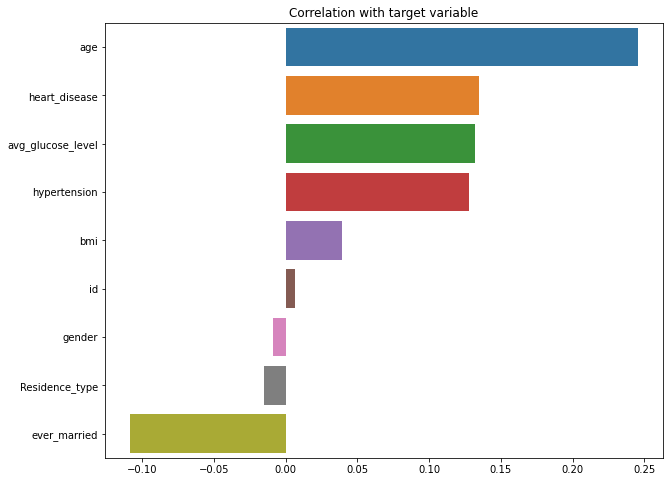

In [16]:
corr_with_target = df.corr().iloc[:-1, -1].sort_values(ascending=False)

plt.figure(figsize=(10, 8))

sns.barplot(x=corr_with_target.values, y=corr_with_target.index)

plt.title('Correlation with target variable')
plt.show()

__Оценка признака "work_type" в разрезе целевой переменной:__

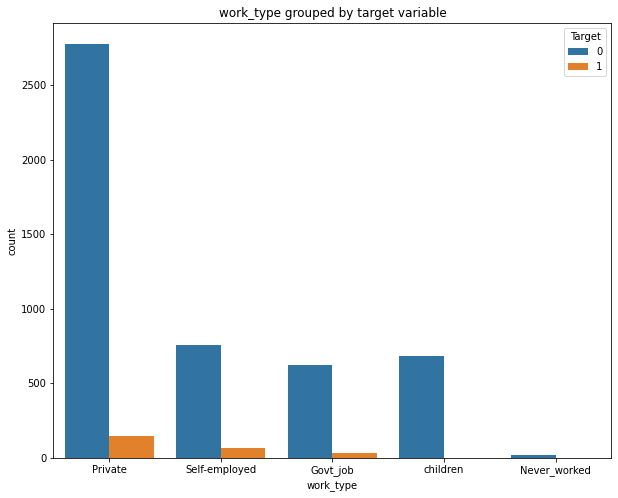

In [17]:
plt.figure(figsize=(10, 8))

sns.countplot(x="work_type", hue=target, data=df)
plt.title('work_type grouped by target variable')
plt.legend(title='Target', loc='upper right')

plt.show()

__Наблюдение__

Из гистограммы видно, что распределения признака work_type имеют схожие доли в разрезе целевой переменной. Если это так, то возможно, например, объединить их в одну категорию.

__Гипотеза__

Нулевая гипотеза: ожидаемые и наблюдаемые частоты согласованы

Альтернативная гипотеза: отклонения в частотах выходят за рамки случайных 
колебаний, расхождения статистически значимы

Критерий: Хи-квадрат Пирсона

Уровень значимости  α : 0.05

Критическая область: двухсторонняя

__Сформируем выборку и рассчитаем наблюдаемые частоты__

In [18]:
work_type_and_stroke = df.loc[df['work_type'].isin(['Private', 'Govt_job']), ['id', 'work_type', 'stroke']]
table = work_type_and_stroke.pivot_table(values='id', index='work_type', columns='stroke', aggfunc='count')
table

stroke,0,1
work_type,,
Govt_job,624,33
Private,2776,149


Проверим нашу гипотезу используя критерий Хи-квадрат Пирсона

In [19]:
chi2, p, dof, expected = chi2_contingency(table, correction=False)
p

0.9401505307957279

P-value получилось больше выбранного уровня значимости, соответственно у нас нет оснований для отвержения нулевой гипотезы и можно допустить, что категории Private и Self-employed одинаково влияют на целевую переменную и их можно объединить в одну категорию.

__Проверим для пары категорий Private и Self-employed:__

In [20]:
work_type_and_stroke = df.loc[df['work_type'].isin(['Private', 'Self-employed']), ['id', 'work_type', 'stroke']]
table = work_type_and_stroke.pivot_table(values='id', index='work_type', columns='stroke', aggfunc='count')
chi2, p, dof, expected = chi2_contingency(table, correction=False)
p

0.001953185891764818

P-value получилось меньше выбранного уровня значимости, соответственно у нас нет оснований для принятия нулевой гипотезы.

__Проверим для пары категорий children и Never_worked:__

In [21]:
work_type_and_stroke = df.loc[df['work_type'].isin(['children', 'Never_worked']), ['id', 'work_type', 'stroke']]
table = work_type_and_stroke.pivot_table(values='id', index='work_type', columns='stroke', aggfunc='count')
chi2, p, dof, expected = chi2_contingency(table, correction=False)
p

nan

P-value получилось больше выбранного уровня значимости, соответственно у нас нет оснований для отвержения нулевой гипотезы и можно допустить, что категории children и Never_worked одинаково влияют на целевую переменную и их можно объединить в одну категорию.

__По итогам объединим пару категорий Private и Govt_job и пару категорий children, Never_worked__ 

In [22]:
df.loc[df['work_type'].isin(['Private', 'Govt_job']), 'work_type'] = 1
df.loc[df['work_type'].isin(['children', 'Never_worked']), 'work_type'] = 0
df.loc[df['work_type'].isin(['Self-employed']), 'work_type'] = 2
df['work_type'] = df['work_type'].astype(int)

__Сгруппируем по категориям признак smoking_status и вычислим средние значения по отношению к целевому признаку__

In [23]:
smoking_status = df.groupby('smoking_status', as_index=False).agg({'stroke':'mean'}).rename(columns={'stroke':'smoking_status_mean'})
smoking_status

,smoking_status,smoking_status_mean
0,Unknown,0.030440
1,formerly smoked,0.079096
2,never smoked,0.047569
3,smokes,0.053232


По таблице не прослеживается связь между курением и сердечными приступами. Возможно, есть связь между курением и ранее выявленным заболеваниями. Вычислим средние значения.

In [24]:
smoking_status = df.groupby('smoking_status', as_index=False).agg({'heart_disease':'mean'}).rename(columns={'heart_disease':'smoking_status_mean'})
smoking_status

,smoking_status,smoking_status_mean
0,Unknown,0.031088
1,formerly smoked,0.087006
2,never smoked,0.047569
3,smokes,0.077313


Средние значения сильно отличаются, возможно, в дальнейшем стоит использовать этот признак для построения новых/

__Оценка признака "avg_glucose_level" в разрезе целевой переменной__

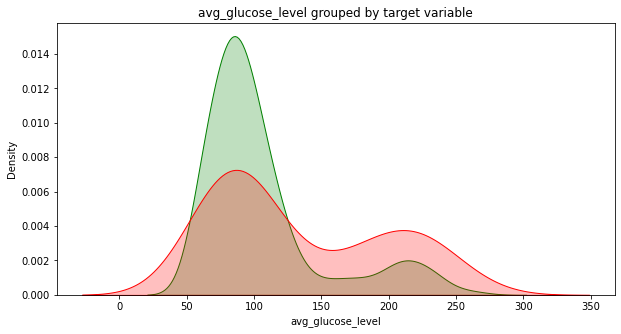

In [25]:
avg_glucose_level_with_target_s = df[['avg_glucose_level', target]].sample(1000)
avg_glucose_level_s = avg_glucose_level_with_target_s['avg_glucose_level']
avg_glucose_level_target_0 = avg_glucose_level_s[avg_glucose_level_with_target_s[target] == 0]
avg_glucose_level_target_1 = avg_glucose_level_s[avg_glucose_level_with_target_s[target] == 1]

plt.figure(figsize=(10, 5))

sns.kdeplot(avg_glucose_level_target_0, shade=True, label='No stroke', color='g')
sns.kdeplot(avg_glucose_level_target_1, shade=True, label='Stroke', color='r')

plt.xlabel('avg_glucose_level')
plt.title('avg_glucose_level grouped by target variable')
plt.show()

__Наблюдение__

Похоже что две группы, полученные в результате разбиения признака "avg_glucose_level" по целевой переменной, имеют различные распределения, что может помочь при построении модели.

__Гипотеза__

Нулевая гипотеза: средние значения в двух независимых выборках равны

Альтернативная гипотеза: средние значения в двух независимых выборках различаются

Критерий: критерий Стьюдента (t-тест) и его аналоги

Уровень значимости  α : 0.05

Критическая область: двухсторонняя

Что бы проверить данную гипотезу сравним две выборки из рассматриваемых групп на предмет равенства средних значений. Если вероятность того, что мат. ожидания в исходных группах равны, при данных выборках, буде менее 5%, то можно будет говорить о том, что скорее всего выборки имеют различные распределения

Произведём визуальную оценку распределения признака, а так же построим QQ-график

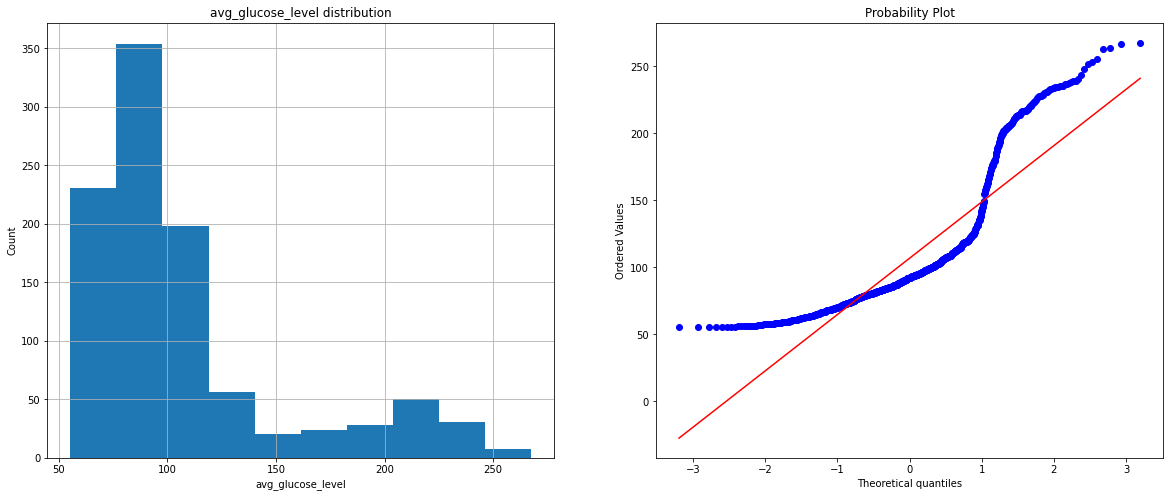

In [26]:
plt.figure(figsize=(20, 8))

ax1 = plt.subplot(121)
ax1.set_xlabel('avg_glucose_level')
ax1.set_ylabel('Count')
ax1.set_title('avg_glucose_level distribution')
avg_glucose_level_s.hist()

plt.subplot(122)
probplot(avg_glucose_level_s, dist='norm', plot=plt)

plt.show()

Проверка распределения признака на "нормальность" с помощью критерия Шапиро-Уилка

In [27]:
shapiro(avg_glucose_level_s)

ShapiroResult(statistic=0.7956070899963379, pvalue=1.18925213466622e-33)

Р-начение сильно меньше ожидаемого уровня и визуальная оценка показывает, что закон распределения отличный от "нормального", в связи с чем, мы не сможем воспользоваться критерием Стьюдента для проверки гипотезы о равности мат. ожиданий признака avg_glucose_level. Построим доверительные интервалы для средних значений, каждой из двух групп и сравним их.

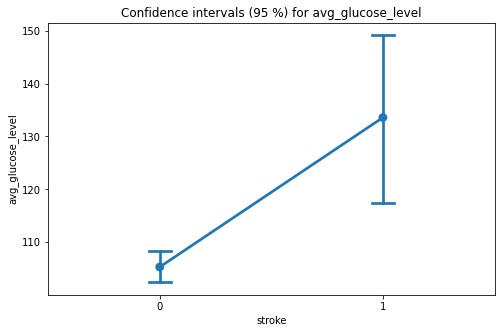

In [28]:
plt.figure(figsize=(8, 5))

sns.pointplot(x=target, y='avg_glucose_level', data=avg_glucose_level_with_target_s, capsize=.1)

plt.title('Confidence intervals (95 %) for avg_glucose_level')
plt.show()

Оценим эквивалентность мат. ожиданий с помощью критерия Манна-Уитни

In [29]:
mannwhitneyu(avg_glucose_level_target_0, avg_glucose_level_target_1)

MannwhitneyuResult(statistic=19799.0, pvalue=0.0027025805324189965)

По графику видно, что интервалы, в которых с 95% вероятностью должны находится истинные мат. ожидания этих двух групп, а также согласно значению p-value сильно отличаются.
Это означает, что группы из которых взяты данные выборки, с допускаемой нами вероятностью (95%), имеют различные распределения.

__Аналогично проверим признак "bmi" в разрезе целевой переменной__

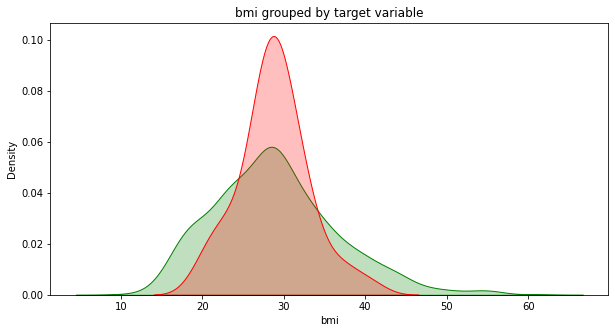

In [30]:
bmi_with_target_s = df[['bmi', target]].sample(1000)
bmi_s = bmi_with_target_s['bmi']
bmi_target_0 = bmi_s[bmi_with_target_s[target] == 0]
bmi_target_1 = bmi_s[bmi_with_target_s[target] == 1]

plt.figure(figsize=(10, 5))

sns.kdeplot(bmi_target_0, shade=True, label='No stroke', color='g')
sns.kdeplot(bmi_target_1, shade=True, label='Stroke', color='r')

plt.xlabel('bmi')
plt.title('bmi grouped by target variable')
plt.show()

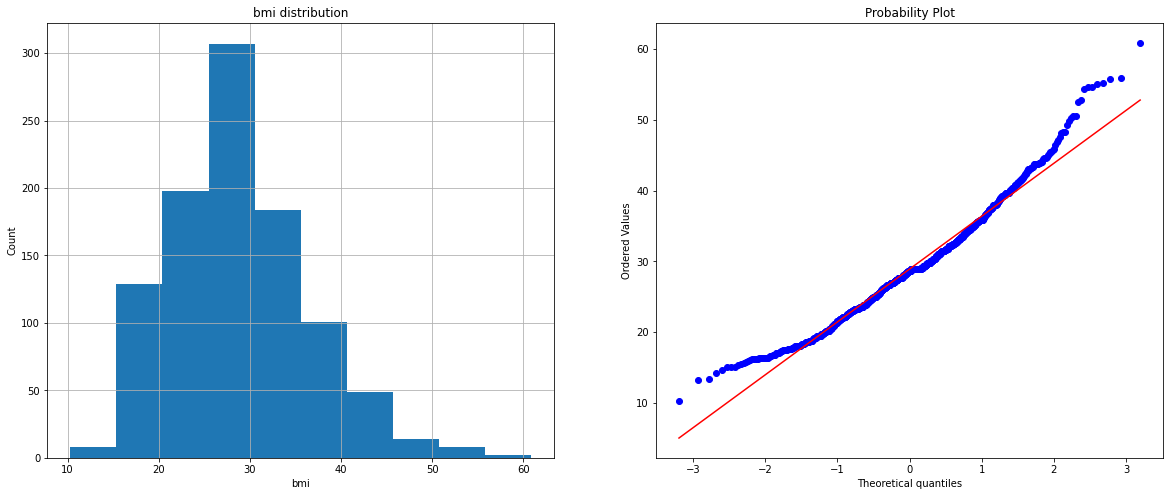

In [31]:
plt.figure(figsize=(20, 8))

ax1 = plt.subplot(121)
ax1.set_xlabel('bmi')
ax1.set_ylabel('Count')
ax1.set_title('bmi distribution')
bmi_s.hist()

plt.subplot(122)
probplot(bmi_s, dist='norm', plot=plt)

plt.show()

In [32]:
shapiro(bmi_s)

ShapiroResult(statistic=0.9736509919166565, pvalue=1.7020083259433605e-12)

Р-начение сильно меньше ожидаемого уровня и визуальная оценка показывает, что закон распределения отличный от "нормального".

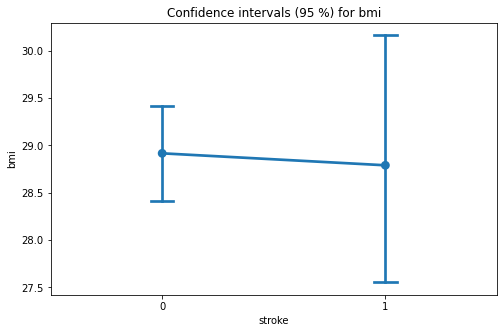

In [33]:
plt.figure(figsize=(8, 5))

sns.pointplot(x=target, y='bmi', data=bmi_with_target_s, capsize=.1)

plt.title('Confidence intervals (95 %) for bmi')
plt.show()

In [34]:
mannwhitneyu(bmi_target_0, bmi_target_1)

MannwhitneyuResult(statistic=19795.0, pvalue=0.3368674954487688)

По графику видно, что интервалы, в которых с 95% вероятностью должны находится истинные мат. ожидания этих двух групп, а также согласно значению p-value, сходятся.
Это означает, что группы, из которых взяты данные выборки, с допускаемой нами вероятностью (95%), имеют одинаковое распределение.

В дальнейшем можно будет задуматься об исключении данного признака из выборки.

__С помощью boxplot посмотрим распределение, медиану, квартили и выбросы по возрасту по признаку bmi.__

<AxesSubplot:xlabel='stroke', ylabel='bmi'>

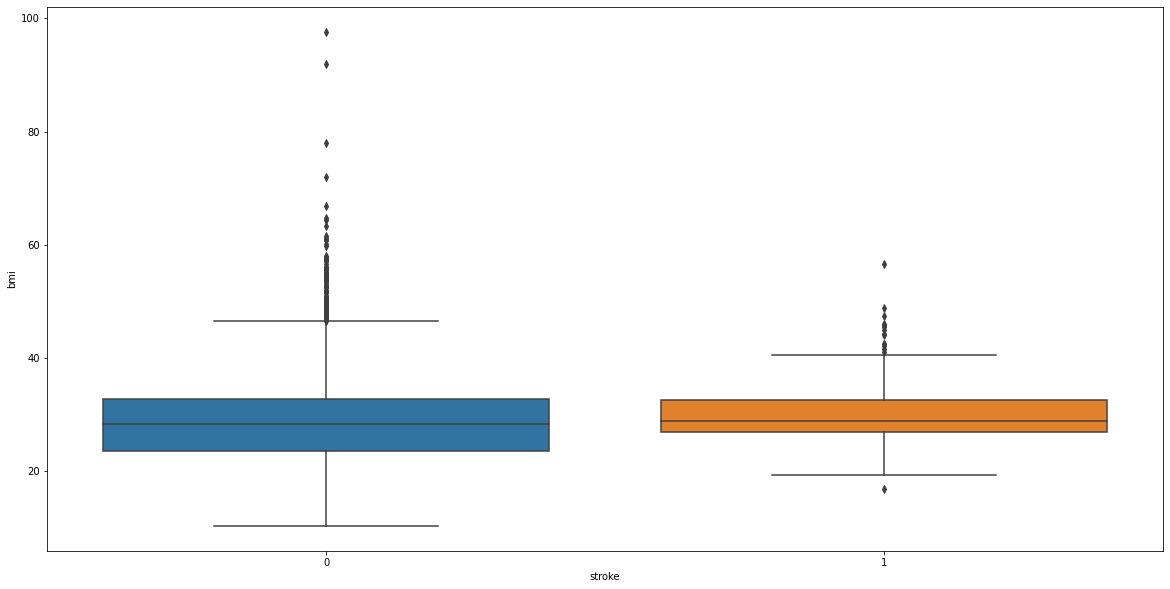

In [35]:
plt.figure(figsize=(20, 10))
sns.boxplot(data = df, x = 'stroke', y = 'bmi')

Из графика видно, что есть выбросы в категории "0". Возможно, их следует исключить из выборки.

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   int64  
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   int64  
 6   work_type          5110 non-null   int32  
 7   Residence_type     5110 non-null   int64  
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int32(1), int64(7), object(1)
memory usage: 459.2+ KB


__Создадим модель линейной регрессии для условной целевой переменной "age" и признаков "avg_glucose_level" и "bmi".__

Проверим корреляцию признаков к целевой переменной

In [37]:
corr_matrix_for_age_bmi = df.loc[:, ['age', 'bmi']].corr()
corr_matrix_for_age_bmi

,age,bmi
age,1.000000,0.325942
bmi,0.325942,1.000000


In [38]:
corr_matrix_for_age_bmi = df.loc[:, ['age', 'avg_glucose_level']].corr()
corr_matrix_for_age_bmi

,age,avg_glucose_level
age,1.000000,0.238171
avg_glucose_level,0.238171,1.000000


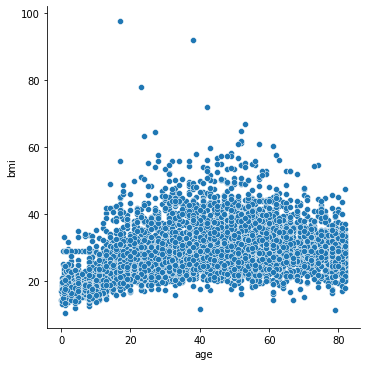

In [39]:
sns.relplot(x="age", y="bmi", data=df);

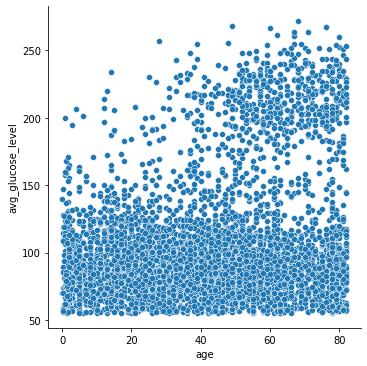

In [40]:
sns.relplot(x="age", y="avg_glucose_level", data=df);

Есть небольшая связь между ними. Создадим модель линейной регрессии.

In [41]:
x = df[['avg_glucose_level', 'bmi']].values
y = df['age'].values

К матрице $X$ (массив `x`) добавим столбец из $1$, соответствующий фиктивному фактору.

In [42]:
ones = np.ones((x.shape[0], 1))
x = np.hstack((ones, x))
x.shape, y.shape

((5110, 3), (5110,))

Запишем матрицу $X^\top X$ и посчитаем её определитель.

In [43]:
XTX = x.T.dot(x)
np.linalg.det(XTX)

1.5746525306913202e+16

In [44]:
XTX_inv = np.linalg.inv(XTX)
b = XTX_inv.dot(x.T).dot(y)
print(b)

[8.26975641 0.09414713 0.86398624]


Модель регрессии имеет вид:
$$y = 8.26 + 0.9 \cdot x_1 + 0.864 \cdot x_2$$
где $x_1$ — показатель уровня сахара, $x_2$ — индекс массы тела.

__Проверим коэффициенты с помошью sklearn.LinearRegression:__

In [45]:
from sklearn.linear_model import LinearRegression
model2 = LinearRegression().fit(x, y)
print(type(model2))
model2.intercept_, model2.coef_

<class 'sklearn.linear_model._base.LinearRegression'>


(8.269756409630197, array([0.        , 0.09414713, 0.86398624]))

Посчитаем коэффициент детерминации для модели:

In [46]:
z = x.dot(b)
R = 1 - ((y - z)**2).sum() / ((y - y.mean()) ** 2).sum()
R

0.14077239094179206

Коэффициент детерминации оказался низок. Признаки объясняют лишь малый процент дисперсии переменной.

__Проведем F-тест Фишера:__

In [47]:
n = x.shape[0]
m = x.shape[1]  - 1

k1 = m
k2 = n - m - 1

alpha = 0.05

t = stats.f.ppf(1 - alpha, k1, k2)
t

2.9974902376133303

Критическая область:
$$\Omega_\alpha = \left( 3.00, \infty \right)$$

In [48]:
F = (R / k1) / ((1 - R) / k2)
F

418.3551558170594

Статистика попала в критическую область, уравнение регрессии признаётся значимым.